In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

# Importing

In [2]:
from ops.ops import load_opt_image, load_SAR_image, load_json, filter_outliers, load_label_image, load_SAR_DN_image
import os
import numpy as np
from skimage.util import view_as_windows
from tqdm.notebook import tqdm_notebook
from matplotlib import pyplot as plt

# Config

In [3]:
conf = load_json(os.path.join('conf', 'conf.json'))
patch_size = conf['patch_size']
min_perc = conf['min_perc']
n_opt_layers = conf['n_opt_layers']
n_sar_layers = conf['n_sar_layers']

train_step = int((1-conf['patch_overlap'])*patch_size)
min_perc = conf['min_perc']

In [4]:
opt_path = os.path.join('D:', 'Ferrari', 'source-imgs', 'pa', 'opt')
sar_path = os.path.join('D:', 'Ferrari', 'source-imgs', 'pa', 'sar')
label_path = os.path.join('D:', 'Ferrari', 'source-imgs', 'pa', 'labels')
cmap_path = os.path.join('D:', 'Ferrari', 'source-imgs', 'pa', 'cmaps')
prep_path = os.path.join('img', 'prepared')

In [5]:
opt_2017 = load_opt_image(os.path.join(opt_path, '17000.tif'))
opt_2018 = load_opt_image(os.path.join(opt_path, '18000.tif'))
opt_2019 = load_opt_image(os.path.join(opt_path, '19000.tif'))

In [6]:
print(opt_2017.shape)
print(opt_2018.shape)
print(opt_2019.shape)

print(opt_2017.dtype)
print(opt_2018.dtype)
print(opt_2019.dtype)

(17730, 9203, 13)
(17730, 9203, 13)
(17730, 9203, 13)


In [7]:
opt_2017 = filter_outliers(opt_2017)
opt_2018 = filter_outliers(opt_2018)
opt_2019 = filter_outliers(opt_2019)

# Preparing data

## Generating statistics

### Optical

In [8]:
opt_mean = []
opt_std = []

opt_mean.append(opt_2017.mean())
opt_mean.append(opt_2018.mean())
opt_mean.append(opt_2019.mean())

opt_std.append(opt_2017.std())
opt_std.append(opt_2018.std())
opt_std.append(opt_2019.std())

opt_mean = np.array(opt_mean).mean()
opt_std = np.array(opt_std).mean()  

In [9]:
#opt_mean = 0
#opt_std = 10000

In [10]:
statistics = np.array([
    opt_mean,
    opt_std
])
print(statistics)
np.save(os.path.join(prep_path, 'statistics.npy'), statistics)

[1386.24269022 1009.52316254]


# Generating data

## Optical

In [11]:
opt_2017 = (opt_2017 - opt_mean) / opt_std
opt_2018 = (opt_2018 - opt_mean) / opt_std
opt_2019 = (opt_2019 - opt_mean) / opt_std

np.save(os.path.join(prep_path, f'opt_2017.npy'), opt_2017.astype(np.float16))
np.save(os.path.join(prep_path, f'opt_2018.npy'), opt_2018.astype(np.float16))
np.save(os.path.join(prep_path, f'opt_2019.npy'), opt_2019.astype(np.float16))

In [12]:
print(f'2017 Mean: {opt_2017.mean():.4f} | Std: {opt_2017.std():.4f}')
print(f'2018 Mean: {opt_2018.mean():.4f} | Std: {opt_2018.std():.4f}')
print(f'2019 Mean: {opt_2019.mean():.4f} | Std: {opt_2019.std():.4f}')

2017 Mean: -0.0039 | Std: 1.0144
2017 Mean: -0.0112 | Std: 0.9837
2017 Mean: 0.0150 | Std: 1.0019


In [14]:
del opt_2017, opt_2018, opt_2019

## Labels, Cloud Maps and Previous Deforestation Maps

In [17]:
label_2018 = os.path.join(label_path, 'label_2018.tif')
label_2019 = os.path.join(label_path, 'label_2019.tif')
previous_2018 = os.path.join(label_path, 'previous_def_2018.tif')
previous_2019 = os.path.join(label_path, 'previous_def_2019.tif')
tiles = os.path.join(label_path, 'tiles.tif')
cmap_2017 = os.path.join(cmap_path, 'cmap_2017.tif')
cmap_2018 = os.path.join(cmap_path, 'cmap_2018.tif')
cmap_2019 = os.path.join(cmap_path, 'cmap_2019.tif')

label_2018 = load_label_image(label_2018)
label_2019 = load_label_image(label_2019)

tiles = load_label_image(tiles)

previous_2018 = load_label_image(previous_2018)
previous_2019 = load_label_image(previous_2019)

cmap_2017 = load_label_image(cmap_2017)
cmap_2018 = load_label_image(cmap_2018)
cmap_2019 = load_label_image(cmap_2019)

np.save(os.path.join(prep_path, 'label_2018.npy'), label_2018)
np.save(os.path.join(prep_path, 'label_2019.npy'), label_2019)

np.save(os.path.join(prep_path, 'previous_2018.npy'), previous_2018)
np.save(os.path.join(prep_path, 'previous_2019.npy'), previous_2019)

np.save(os.path.join(prep_path, f'cmap_2017.npy'), cmap_2017)
np.save(os.path.join(prep_path, f'cmap_2018.npy'), cmap_2018)
np.save(os.path.join(prep_path, f'cmap_2019.npy'), cmap_2019)

In [18]:
print(cmap_2017.shape)
print(cmap_2018.shape)
print(cmap_2019.shape)

print(label_2018.shape)
print(label_2019.shape)

print(previous_2018.shape)
print(previous_2019.shape)

print(tiles.shape)

(17730, 9203)
(17730, 9203)
(17730, 9203)
(17730, 9203)
(17730, 9203)
(17730, 9203)
(17730, 9203)
(17730, 9203)


## Generating patches

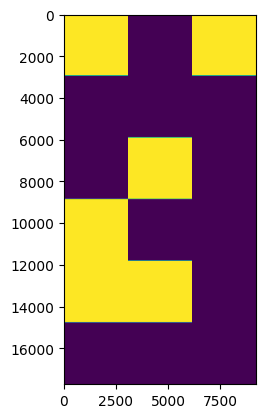

In [19]:
plt.imshow(tiles)
#plt.show()

In [20]:
shape = label_2018.shape[0:2]
idx_matrix = np.arange(shape[0]*shape[1], dtype=np.uint32).reshape(shape)

label_patches_2018 = view_as_windows(label_2018, (patch_size, patch_size), train_step).reshape((-1, patch_size, patch_size))
label_patches_2019 = view_as_windows(label_2019, (patch_size, patch_size), train_step).reshape((-1, patch_size, patch_size))
tiles_patches = view_as_windows(tiles, (patch_size, patch_size), train_step).reshape((-1, patch_size, patch_size))
idx_patches = view_as_windows(idx_matrix, (patch_size, patch_size), train_step).reshape((-1, patch_size, patch_size))

keep_patches_2018 = np.mean((label_patches_2018 == 1), axis=(1,2)) >= min_perc
keep_patches_2019 = np.mean((label_patches_2019 == 1), axis=(1,2)) >= min_perc

tiles_patches_2018 = tiles_patches[keep_patches_2018]
tiles_patches_2019 = tiles_patches[keep_patches_2019]
print(tiles_patches_2018.shape)
print(tiles_patches_2019.shape)

keep_patches_2018_train = np.all(tiles_patches_2018 == 0, axis=(1,2))
keep_patches_2018_val = np.all(tiles_patches_2018 == 1, axis=(1,2))

keep_patches_2019_train = np.all(tiles_patches_2019 == 0, axis=(1,2))
keep_patches_2019_val = np.all(tiles_patches_2019 == 1, axis=(1,2))

idx_patches_2018_train = idx_patches[keep_patches_2018][keep_patches_2018_train]
idx_patches_2018_val = idx_patches[keep_patches_2018][keep_patches_2018_val]
idx_patches_2019_train = idx_patches[keep_patches_2019][keep_patches_2019_train]
idx_patches_2019_val = idx_patches[keep_patches_2019][keep_patches_2019_val]

print(idx_patches_2018_train.shape)
print(idx_patches_2018_val.shape)
print(idx_patches_2019_train.shape)
print(idx_patches_2019_val.shape)

np.save(os.path.join(prep_path, 'patches_2018_train.npy'), idx_patches_2018_train)
np.save(os.path.join(prep_path, 'patches_2018_val.npy'), idx_patches_2018_val)

np.save(os.path.join(prep_path, 'patches_2019_train.npy'), idx_patches_2019_train)
np.save(os.path.join(prep_path, 'patches_2019_val.npy'), idx_patches_2019_val)

del idx_patches, label_patches_2018, label_patches_2019, idx_matrix, idx_patches_2018_train, idx_patches_2018_val, idx_patches_2019_train, idx_patches_2019_val

(7890, 128, 128)
(7586, 128, 128)
(4791, 128, 128)
(2861, 128, 128)
(4370, 128, 128)
(2913, 128, 128)


In [21]:
shape = label_2018.shape[0:2]
idx_matrix = np.arange(shape[0]*shape[1], dtype=np.uint32).reshape(shape)

label_patches_2018 = view_as_windows(label_2018, (patch_size, patch_size), train_step).reshape((-1, patch_size, patch_size))
label_patches_2019 = view_as_windows(label_2019, (patch_size, patch_size), train_step).reshape((-1, patch_size, patch_size))
tiles_patches = view_as_windows(tiles, (patch_size, patch_size), train_step).reshape((-1, patch_size, patch_size))
idx_patches = view_as_windows(idx_matrix, (patch_size, patch_size), train_step).reshape((-1, patch_size, patch_size))

keep_patches_2018 = np.mean((label_patches_2018 == 1), axis=(1,2)) < min_perc
keep_patches_2019 = np.mean((label_patches_2019 == 1), axis=(1,2)) < min_perc

tiles_patches_2018 = tiles_patches[keep_patches_2018]
tiles_patches_2019 = tiles_patches[keep_patches_2019]
print(tiles_patches_2018.shape)
print(tiles_patches_2019.shape)

keep_patches_2018_train = np.all(tiles_patches_2018 == 0, axis=(1,2))
keep_patches_2018_val = np.all(tiles_patches_2018 == 1, axis=(1,2))

keep_patches_2019_train = np.all(tiles_patches_2019 == 0, axis=(1,2))
keep_patches_2019_val = np.all(tiles_patches_2019 == 1, axis=(1,2))

idx_patches_2018_train = idx_patches[keep_patches_2018][keep_patches_2018_train]
idx_patches_2018_val = idx_patches[keep_patches_2018][keep_patches_2018_val]
idx_patches_2019_train = idx_patches[keep_patches_2019][keep_patches_2019_train]
idx_patches_2019_val = idx_patches[keep_patches_2019][keep_patches_2019_val]

print(idx_patches_2018_train.shape)
print(idx_patches_2018_val.shape)
print(idx_patches_2019_train.shape)
print(idx_patches_2019_val.shape)

np.save(os.path.join(prep_path, 'c_patches_2018_train.npy'), idx_patches_2018_train)
np.save(os.path.join(prep_path, 'c_patches_2018_val.npy'), idx_patches_2018_val)

np.save(os.path.join(prep_path, 'c_patches_2019_train.npy'), idx_patches_2019_train)
np.save(os.path.join(prep_path, 'c_patches_2019_val.npy'), idx_patches_2019_val)

del idx_patches, label_patches_2018, label_patches_2019, idx_matrix, idx_patches_2018_train, idx_patches_2018_val, idx_patches_2019_train, idx_patches_2019_val

(103006, 128, 128)
(103310, 128, 128)
(67315, 128, 128)
(32386, 128, 128)
(67736, 128, 128)
(32334, 128, 128)
